# Import Library

In [12]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns

# 시작

In [13]:
cwd = os.getcwd()
print('현재 폴더 경로 : ', cwd)
# 폴더 위치 변경
os.chdir("C:\\Users\hyunj\\Dropbox\\종합설계프로젝트\\중요\\데이터\\통합")
print('변경 후 폴더 경로 : ', cwd)
print('현재 폴더 파일 : ', os.listdir())
data = pd.read_csv('LD Data for training.csv', encoding='CP949')
print('feature 항목 : ', data.columns)
data

현재 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터\통합
변경 후 폴더 경로 :  C:\Users\hyunj\Dropbox\종합설계프로젝트\중요\데이터\통합
현재 폴더 파일 :  ['A92DA000', 'Data.csv', 'Integrated DS.csv', 'Integrated DStoLD.csv', 'Integrated LD.csv', 'LD Data for training.csv']
feature 항목 :  Index(['CONTAINER_NO', 'LD_VESSEL_ID', 'LD_VESSEL_YEAR', 'LD_COUNTRY_POD',
       'LD_CITY_POD', 'Full_Empty', 'LD_BLOCK', 'LD_BAY', 'LD_CHE_ID',
       'LD_ITV_ID', 'LD_QC_ID', 'LD_EXTERNAL_TRUCK',
       'LD_QUEUE_POSITION_NUMBER', 'LD_QUEUE_POSITION_HACK_DACK', 'LD_H_BOX',
       'LD_DAY', 'GI_DAY', 'Dwell Time'],
      dtype='object')


C:\Users\hyunj\AppData\Local\Temp\ipykernel_2132\1390268559.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('LD Data for training.csv', encoding='CP949')


,CONTAINER_NO,LD_VESSEL_ID,LD_VESSEL_YEAR,LD_COUNTRY_POD,LD_CITY_POD,Full_Empty,LD_BLOCK,LD_BAY,LD_CHE_ID,LD_ITV_ID,LD_QC_ID,LD_EXTERNAL_TRUCK,LD_QUEUE_POSITION_NUMBER,LD_QUEUE_POSITION_HACK_DACK,LD_H_BOX,LD_DAY,GI_DAY,Dwell Time
0,UETU,SXNW,2018,CA,PRR,F,1F,18,TC261,YT533,GC109,경기98아6960,2,D,1329.0,Tuesday,Thursday,979063
1,UESU,SXNW,2018,CA,PRR,F,3C,53,TC236,YT530,GC111,부산98바7132,30,H,1329.0,Monday,Thursday,379524
2,TTNU,SXNW,2018,CA,PRR,F,1D,06,TC241,YT570,GC109,부산99사8091,18,H,1329.0,Tuesday,Sunday,711237
3,TRLU,SXNW,2018,CA,PRR,F,1F,59,TC262,YT523,GC110,부산99바9646,18,H,1329.0,Monday,Tuesday,535145
4,TRLU,SXNW,2018,CA,PRR,F,1D,06,TC241,YT569,GC111,울산99바1119,42,D,1329.0,Tuesday,Tuesday,593249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36936,FCLU,ALAP,2018,CA,VAN,F,2D,86,TC244,YT503,GC111,경북99아7008,34,D,531.0,Wednesday,Wednesday,646045
36937,DFSU,ALAP,2018,CA,VAN,F,2B,41,TC224,YT507,GC111,부산98바3826,34,H,531.0,Wednesday,Friday,453974
36938,CNIU,ALAP,2018,CA,VAN,F,2B,41,TC224,YT507,GC111,부산98바3826,34,H,531.0,Wednesday,Friday,453836
36939,CNIU,ALAP,2018,CA,VAN,F,1B,25,TC221,YT525,GC110,경북99아6726,26,H,531.0,Wednesday,Friday,468921


In [14]:
data.isnull().sum()

CONTAINER_NO                    0
LD_VESSEL_ID                    0
LD_VESSEL_YEAR                  0
LD_COUNTRY_POD                  0
LD_CITY_POD                     0
Full_Empty                      0
LD_BLOCK                        0
LD_BAY                          0
LD_CHE_ID                       0
LD_ITV_ID                       9
LD_QC_ID                        0
LD_EXTERNAL_TRUCK              29
LD_QUEUE_POSITION_NUMBER        0
LD_QUEUE_POSITION_HACK_DACK     0
LD_H_BOX                        0
LD_DAY                          0
GI_DAY                          0
Dwell Time                      0
dtype: int64

In [15]:
data.dropna(axis=0, inplace=True)

In [16]:
# dwell time이 음수인 항들은 제외
temp = list(data[data['Dwell Time'] < 0].index)

for index in temp :
    data.drop(index, axis=0, inplace=True)
print(data.shape)

data.reset_index(drop=True, inplace=True)

(36900, 18)


In [17]:
data.describe()

,LD_VESSEL_YEAR,LD_QUEUE_POSITION_NUMBER,LD_H_BOX,Dwell Time
count,36900.000000,36900.000000,36900.000000,3.690000e+04
mean,2017.943930,35.211355,2172.956341,4.857746e+05
std,0.230061,21.116309,1256.110990,4.139408e+05
min,2017.000000,1.000000,43.000000,3.840000e+02
25%,2018.000000,18.000000,828.000000,2.283300e+05
50%,2018.000000,34.000000,2552.000000,3.891005e+05
75%,2018.000000,50.000000,3397.000000,6.302420e+05
max,2018.000000,94.000000,4030.000000,1.190474e+07


In [18]:
# Label Encodering
features = [x for x in data.columns if x not in ['Time of DS-QUAYSIDE', 'Time_of_DS_MOVE', 'Time of DS-YARDSIDE', "Dwell Time"]]
features

['CONTAINER_NO',
 'LD_VESSEL_ID',
 'LD_VESSEL_YEAR',
 'LD_COUNTRY_POD',
 'LD_CITY_POD',
 'Full_Empty',
 'LD_BLOCK',
 'LD_BAY',
 'LD_CHE_ID',
 'LD_ITV_ID',
 'LD_QC_ID',
 'LD_EXTERNAL_TRUCK',
 'LD_QUEUE_POSITION_NUMBER',
 'LD_QUEUE_POSITION_HACK_DACK',
 'LD_H_BOX',
 'LD_DAY',
 'GI_DAY']

In [19]:
for feature in features:
    lbl_enc = preprocessing.LabelEncoder()
    data[feature] = lbl_enc.fit_transform(data[feature].fillna("-1").astype(str).values)

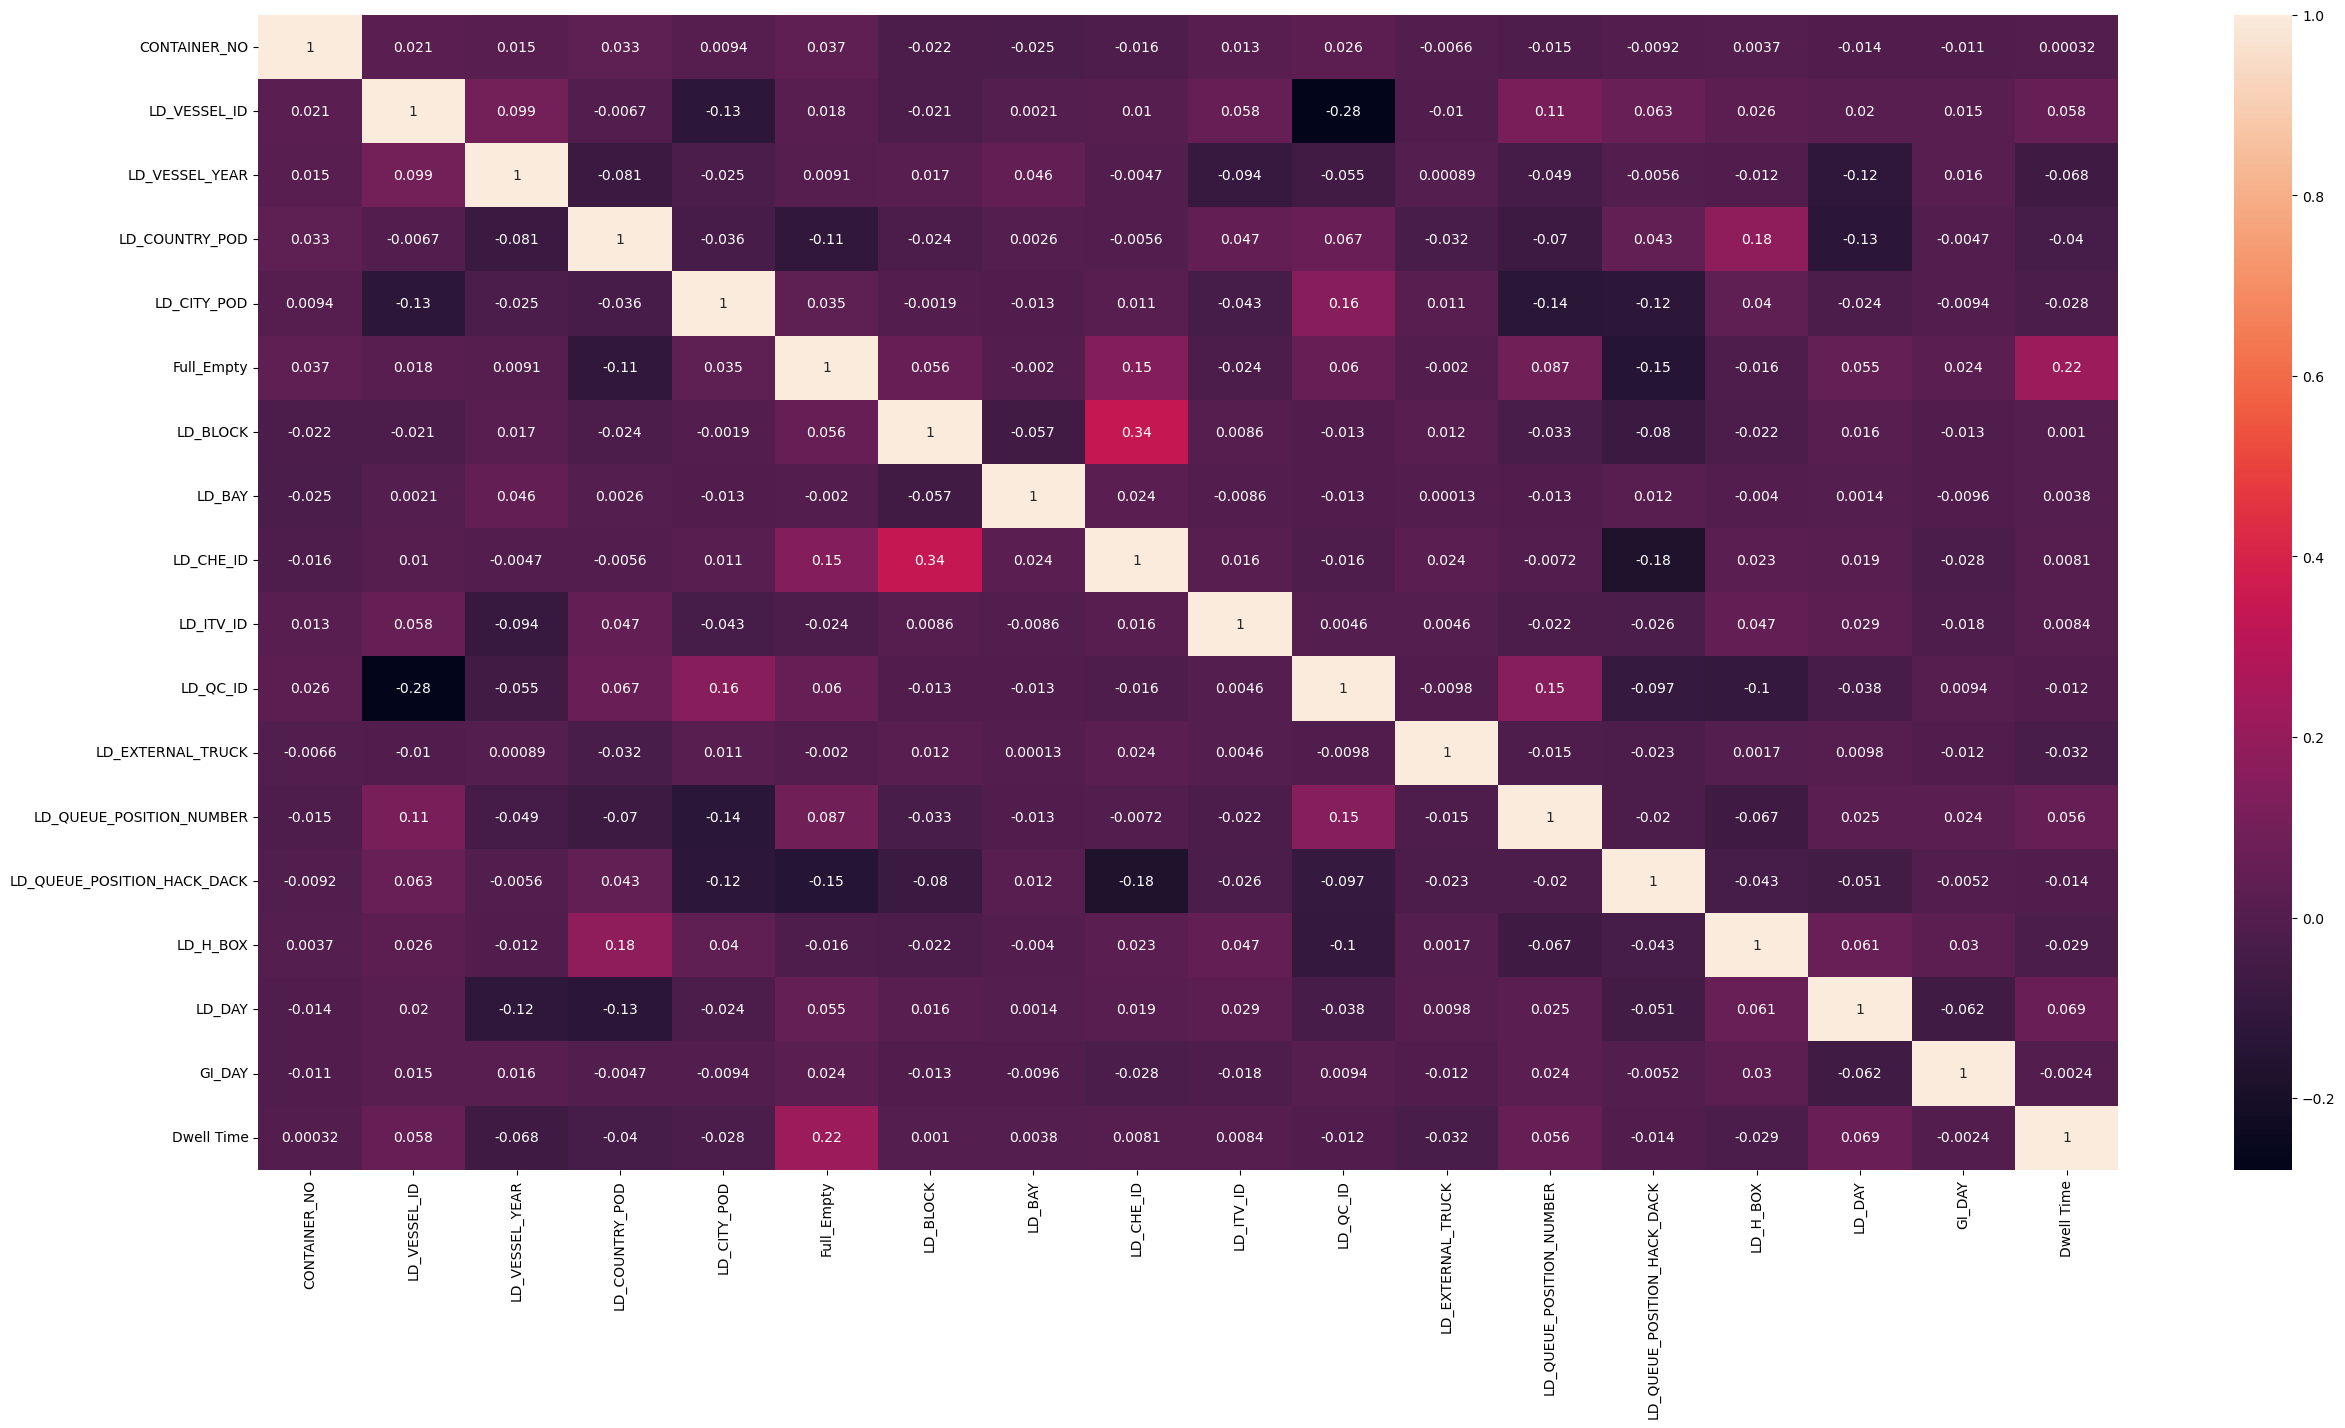

In [20]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [21]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=120)

# 랜덤포레스트 모델 생성
tRF = RandomForestRegressor()
tRF.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error 

# MAE 측정
# MAE_train
y_pred_train = tRF.predict(X_train)
y_pred_test = tRF.predict(X_test)


mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test,y_pred_test)
print('train_MAE: ',mae_train)
print('test_MAE: ',mae_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Train MSE : ", mse_train)
print("Train RMSE : ", mse_train**0.5)
print("Test MSE : ", mse_test)
print("Test RMSE : ", mse_test**0.5)

r2 = r2_score(y_test, tRF.predict(X_test))
print('테스트 결정계수(R2, 설명력) :', r2)     

train_MAE:  54007.04871889141
test_MAE:  139002.23035914957
Train MSE :  12215490555.895554
Train RMSE :  110523.71037879407
Test MSE :  73863558417.62865
Test RMSE :  271778.5098524691
테스트 결정계수(R2, 설명력) : 0.502012720276991


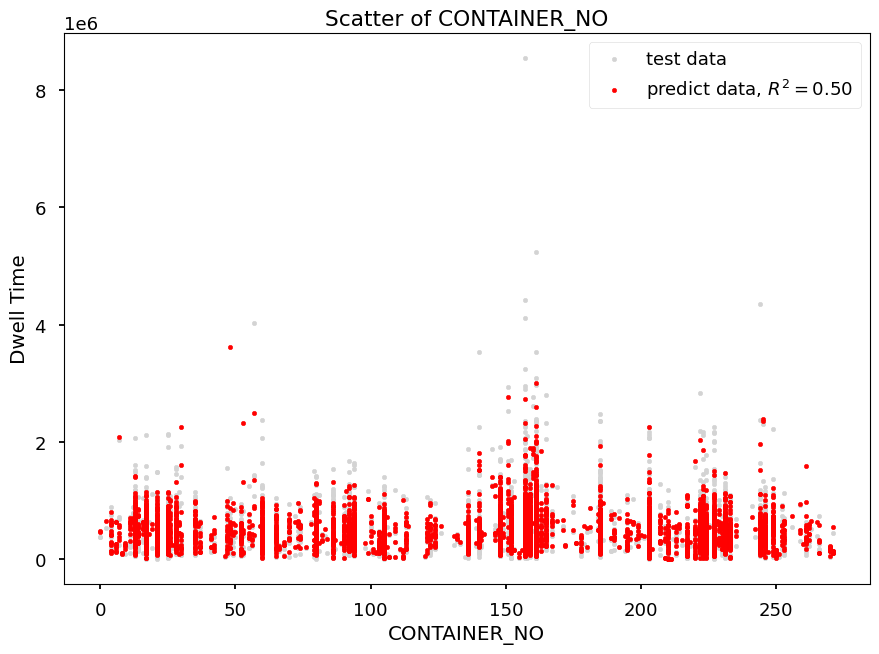

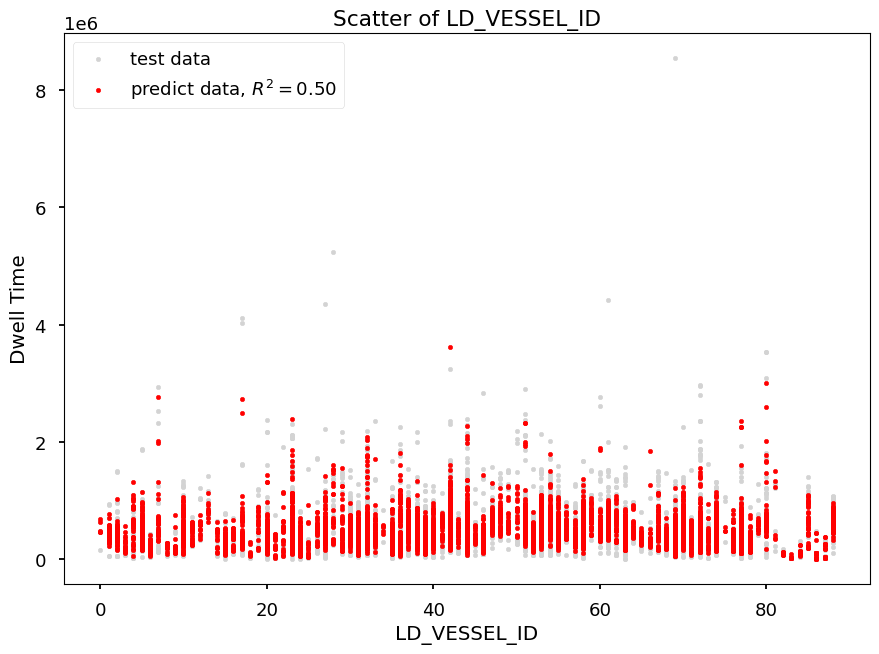

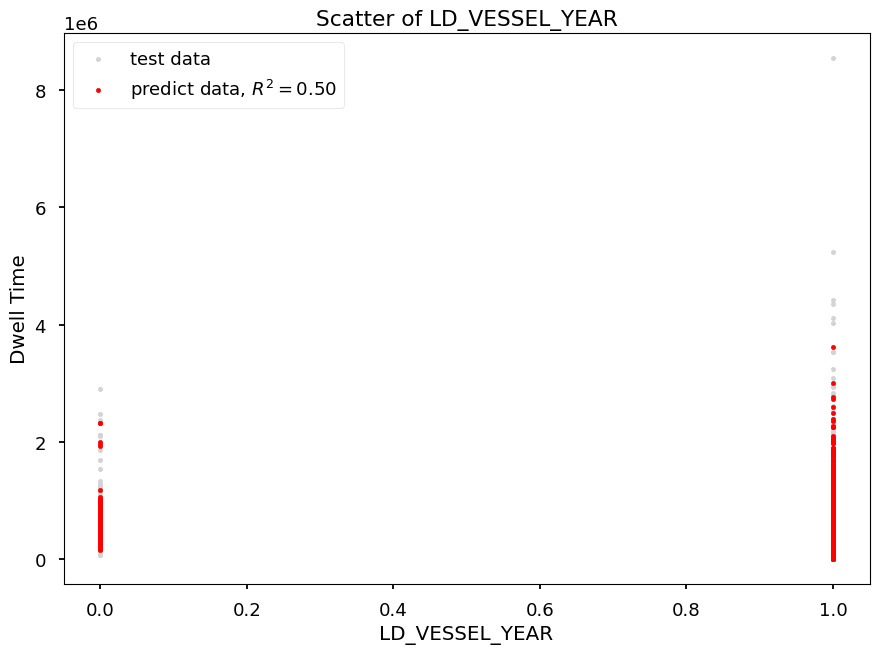

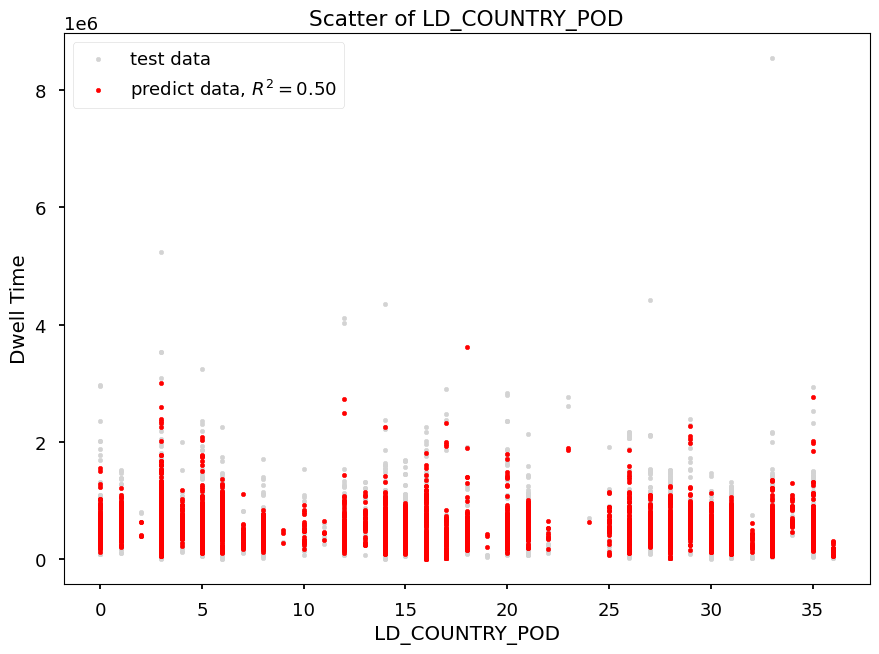

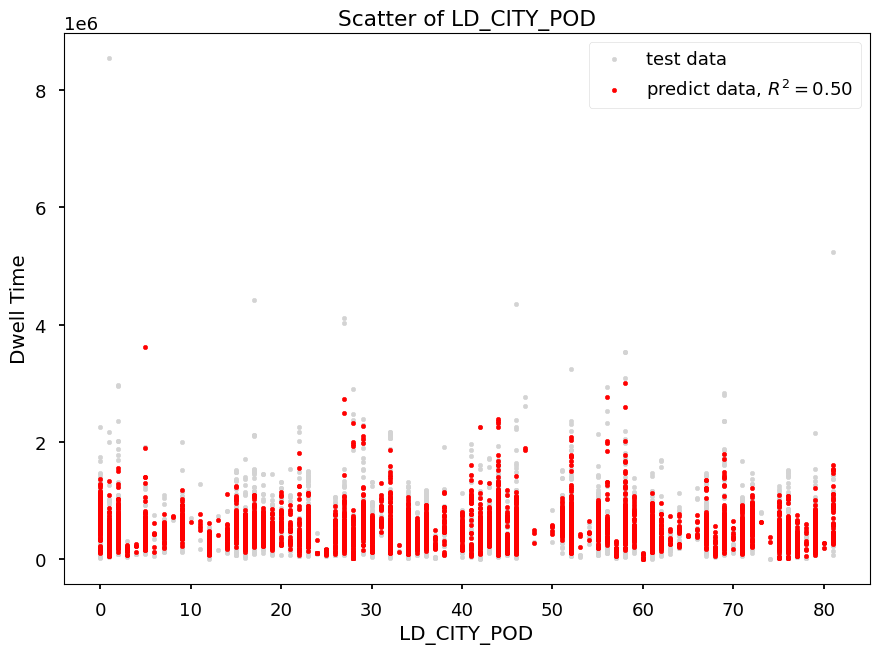

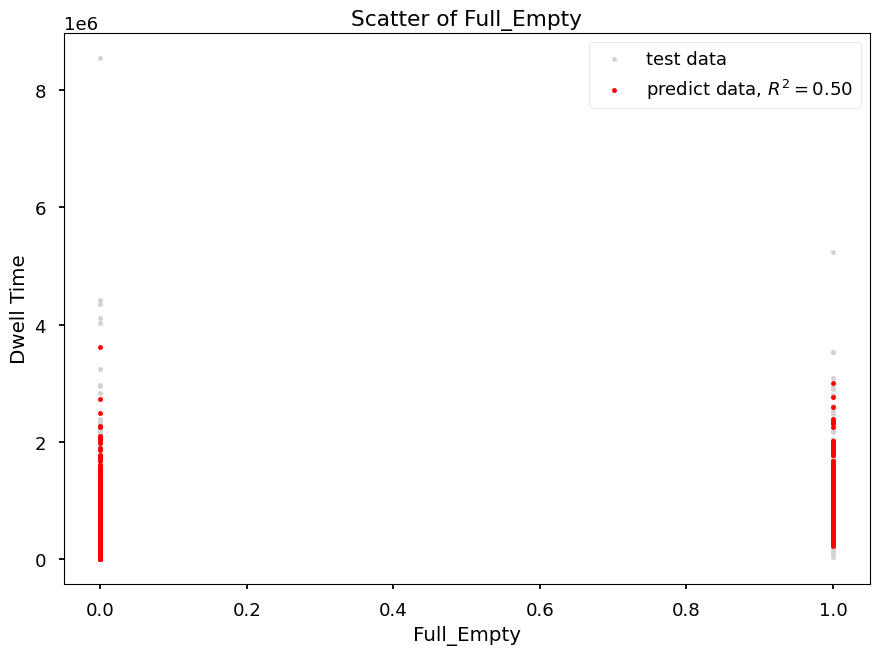

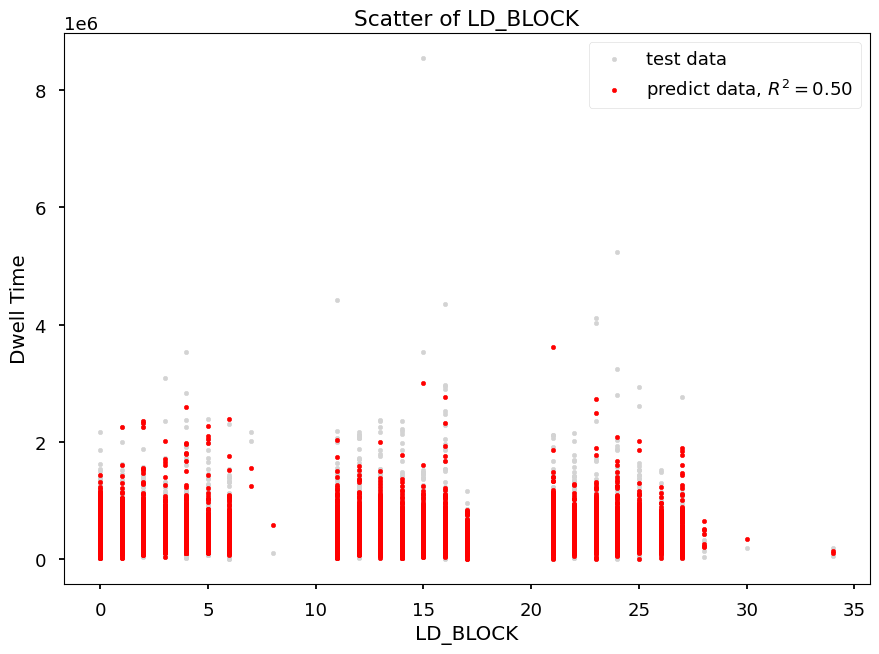

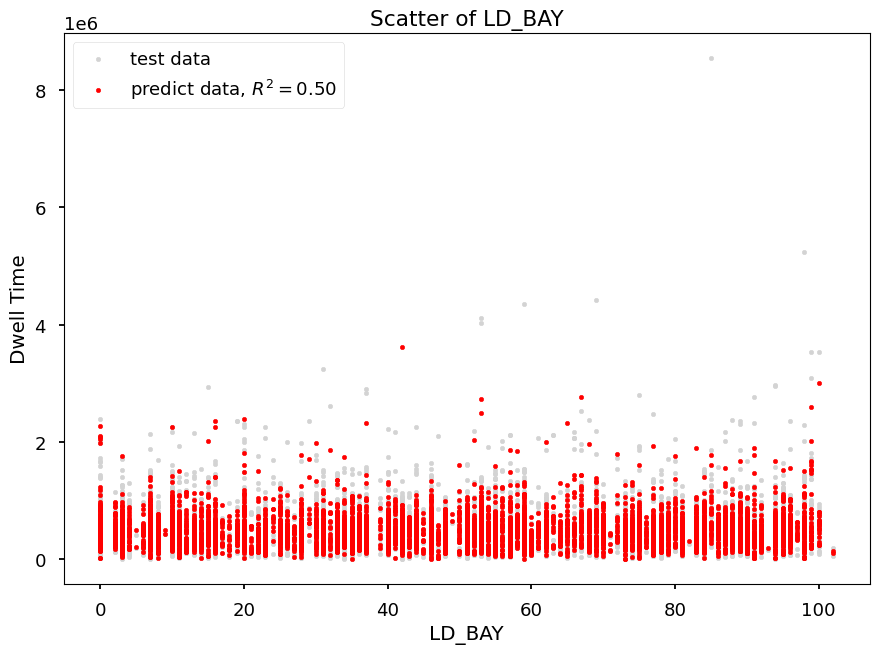

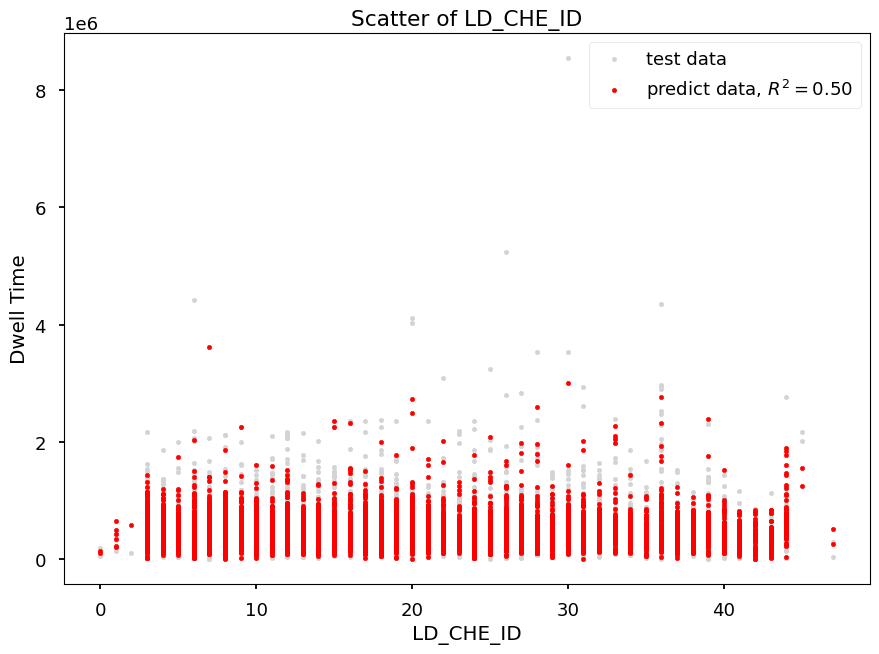

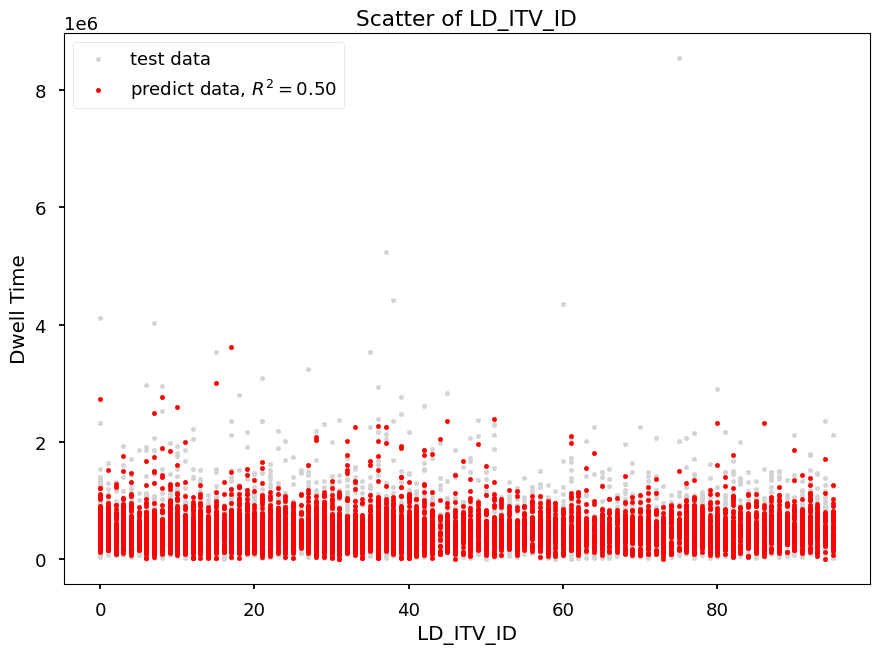

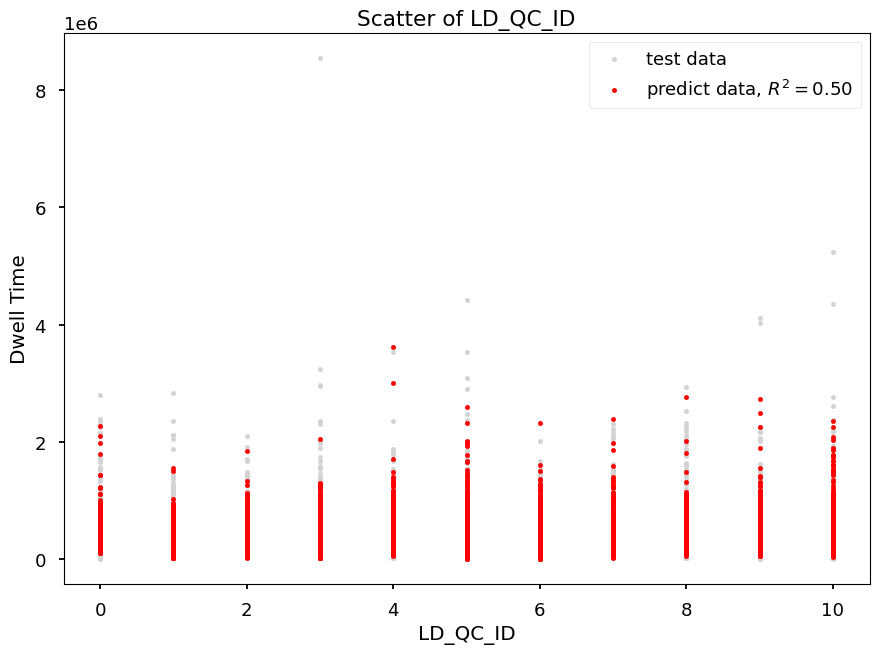

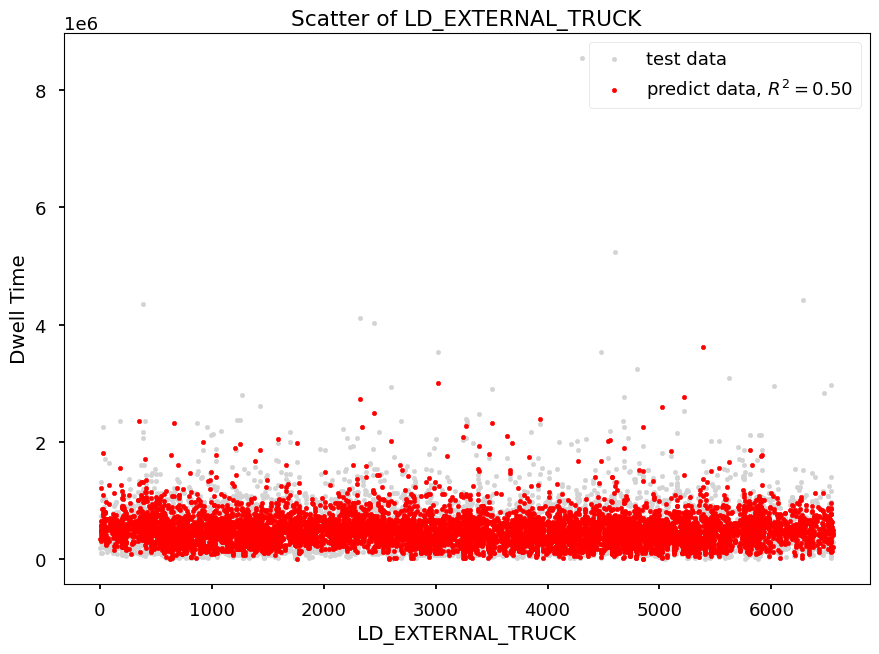

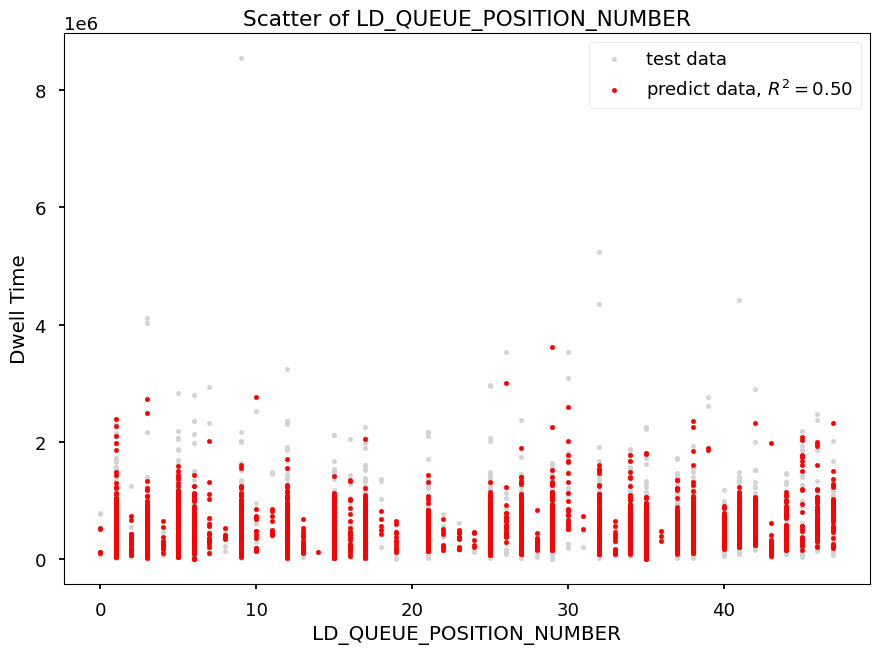

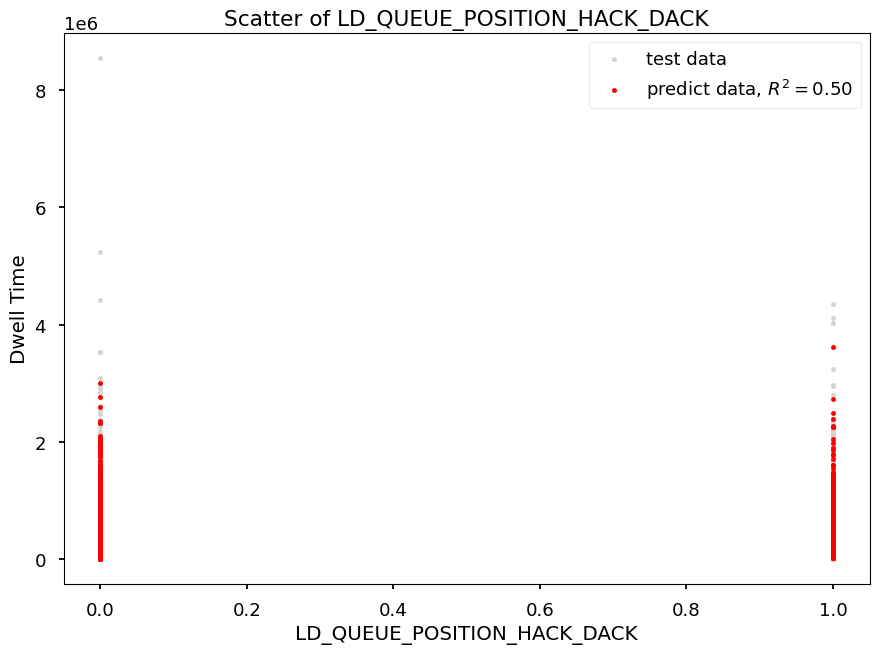

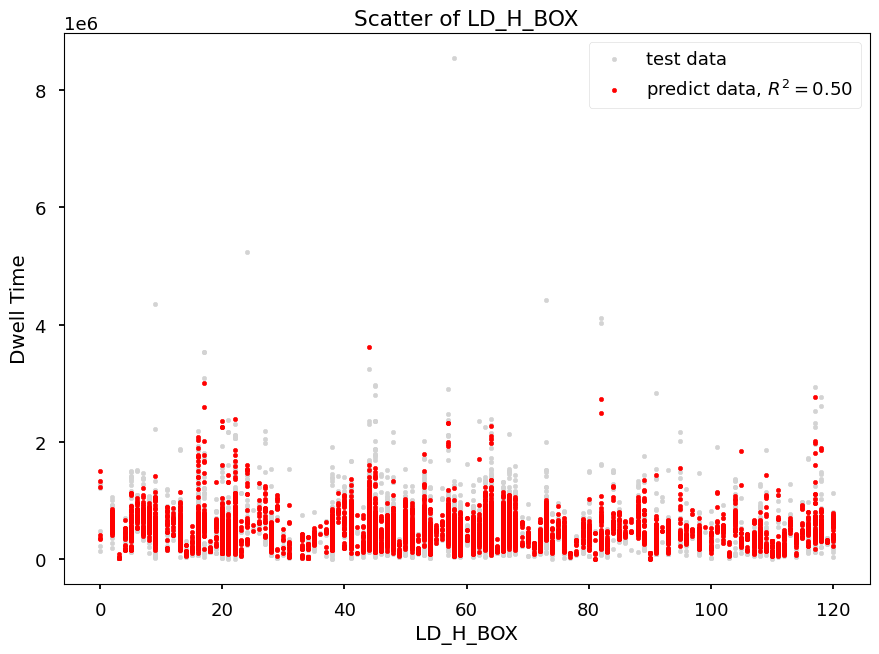

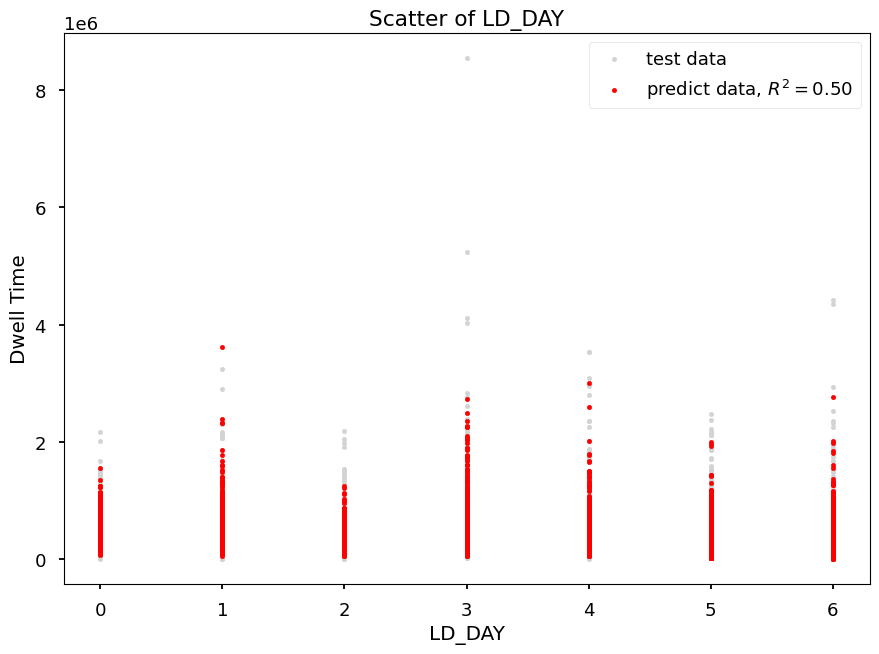

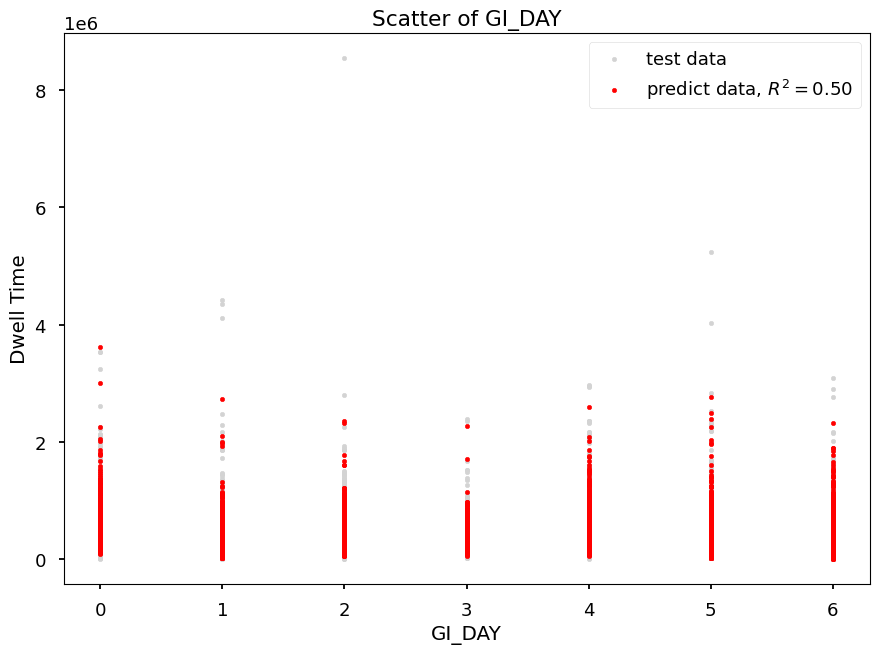

In [22]:
from matplotlib import style 
style.use('seaborn-talk')
for feature in features :
    plt.scatter(X_test[feature], y_test, c='lightgray', label='test data', s = 10)
    plt.scatter(X_test[feature], tRF.predict(X_test), c='r', label='predict data, $R^2=%.2f$'%r2, s = 10)
    plt.xlabel(feature)
    plt.title('Scatter of ' + feature)
    plt.ylabel('Dwell Time')
    plt.legend()
    plt.show()

In [23]:
# 변수중요도
imp = tRF.feature_importances_
imp



array([0.06824486, 0.06378752, 0.00934006, 0.04471559, 0.07818818,
       0.046534  , 0.07382968, 0.11248993, 0.07736501, 0.0602439 ,
       0.03580395, 0.09827064, 0.05501246, 0.01105734, 0.05695495,
       0.03288342, 0.07527851])

([<matplotlib.axis.YTick at 0x249d91f96d0>,
 [Text(0, 0, 'CONTAINER_NO'),
  Text(0, 1, 'LD_VESSEL_ID'),
  Text(0, 2, 'LD_VESSEL_YEAR'),
  Text(0, 3, 'LD_COUNTRY_POD'),
  Text(0, 4, 'LD_CITY_POD'),
  Text(0, 5, 'Full_Empty'),
  Text(0, 6, 'LD_BLOCK'),
  Text(0, 7, 'LD_BAY'),
  Text(0, 8, 'LD_CHE_ID'),
  Text(0, 9, 'LD_ITV_ID'),
  Text(0, 10, 'LD_QC_ID'),
  Text(0, 11, 'LD_EXTERNAL_TRUCK'),
  Text(0, 12, 'LD_QUEUE_POSITION_NUMBER'),
  Text(0, 13, 'LD_QUEUE_POSITION_HACK_DACK'),
  Text(0, 14, 'LD_H_BOX'),
  Text(0, 15, 'LD_DAY'),
  Text(0, 16, 'GI_DAY')])

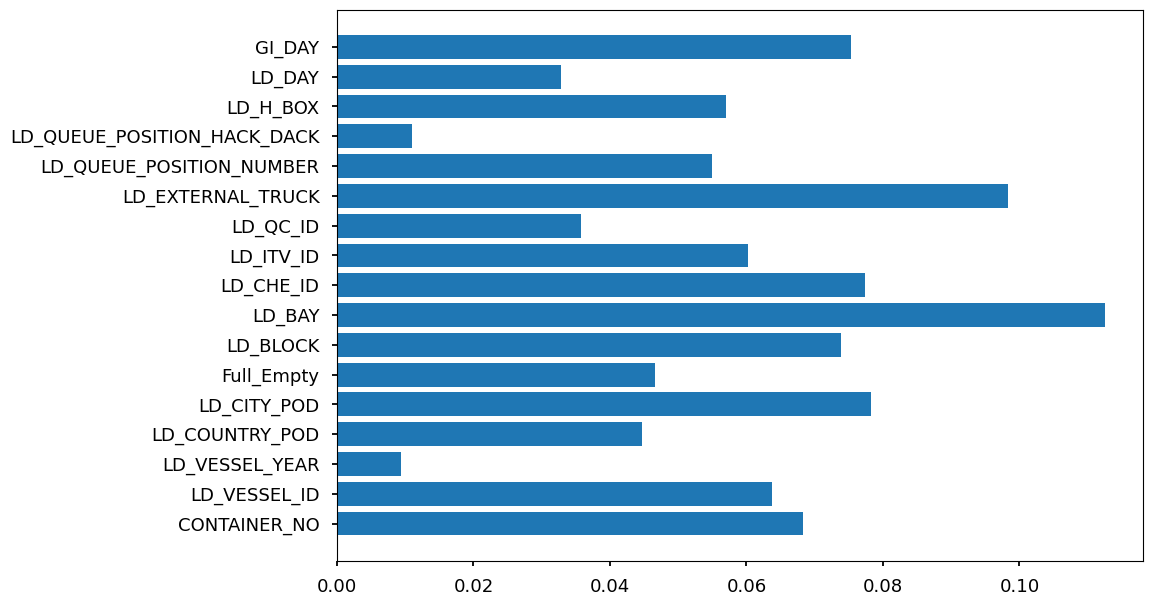

In [24]:
len(imp)
colnames = tRF.feature_names_in_
colnames
import matplotlib.pyplot as plt
plt.barh(range(len(imp)), imp)
plt.yticks(range(len(imp)), colnames)

c:\Users\hyunj\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


KeyboardInterrupt: 

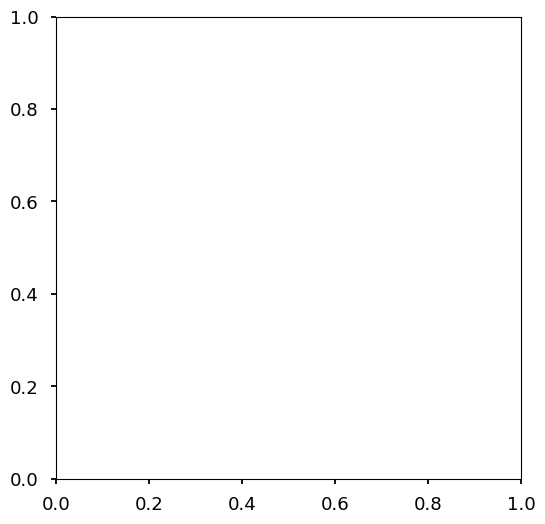

In [25]:


# PDP
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from matplotlib import pyplot as plt


feature_list = list(X.columns)
for feature in feature_list :
    fig, ax = plt.subplots(figsize=(6, 6))
    plot_partial_dependence(estimator=tRF,X=X,features=[feature],grid_resolution=round(X.shape[0]*0.5),percentiles=(0, 1),kind='average', method='brute')
